<a href="https://colab.research.google.com/github/Khipucamayoc/Quipucamayoc/blob/master/research/waveglow/waveglow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import os
import matplotlib
%matplotlib inline
import matplotlib.pylab as plt
import torch

In [2]:
!git clone https://github.com/NVIDIA/waveglow.git
os.chdir('waveglow')
!git submodule init
!git submodule update

fatal: destination path 'waveglow' already exists and is not an empty directory.


In [3]:
!pip install tensorflow-gpu==1.15.0 tensorboardX
#!pip3 install -r tacotron2/requirements.txt

In [4]:
os.chdir('/content')
!git clone https://github.com/NVIDIA/apex
os.chdir('apex')
!pip install -v --no-cache-dir ./
# CUDA version error
#!pip install -v --no-cache-dir --global-option="--cpp_ext" --global-option="--cuda_ext" ./
os.chdir('../waveglow')

fatal: destination path 'apex' already exists and is not an empty directory.
Created temporary directory: /tmp/pip-ephem-wheel-cache-mg4z_0fr
Created temporary directory: /tmp/pip-req-tracker-aap_tbm1
Created requirements tracker '/tmp/pip-req-tracker-aap_tbm1'
Created temporary directory: /tmp/pip-install-udwqkh81
Processing /content/apex
  Created temporary directory: /tmp/pip-req-build-86b50f9g
  Added file:///content/apex to build tracker '/tmp/pip-req-tracker-aap_tbm1'
    Running setup.py (path:/tmp/pip-req-build-86b50f9g/setup.py) egg_info for package from file:///content/apex
    Running command python setup.py egg_info
    torch.__version__  =  1.3.1
    running egg_info
    creating /tmp/pip-req-build-86b50f9g/pip-egg-info/apex.egg-info
    writing /tmp/pip-req-build-86b50f9g/pip-egg-info/apex.egg-info/PKG-INFO
    writing dependency_links to /tmp/pip-req-build-86b50f9g/pip-egg-info/apex.egg-info/dependency_links.txt
    writing top-level names to /tmp/pip-req-build-86b50f9g/

In [5]:
!wget https://api.ngc.nvidia.com/v2/models/nvidia/waveglow_ljs_256channels/versions/3/files/waveglow_256channels_ljs_v3.pt

--2019-12-02 23:18:36--  https://api.ngc.nvidia.com/v2/models/nvidia/waveglow_ljs_256channels/versions/3/files/waveglow_256channels_ljs_v3.pt
Resolving api.ngc.nvidia.com (api.ngc.nvidia.com)... 35.161.41.62, 52.35.21.100
Connecting to api.ngc.nvidia.com (api.ngc.nvidia.com)|35.161.41.62|:443... connected.
HTTP request sent, awaiting response... 302 
Location: https://s3.us-west-2.amazonaws.com/prod-model-registry-ngc-bucket/org/nvidia/models/waveglow_ljs_256channels/versions/3/files/waveglow_256channels_ljs_v3.pt?response-content-disposition=attachment%3B%20filename%3D%22waveglow_256channels_ljs_v3.pt%22&response-content-type=application%2Foctet-stream&X-Amz-Security-Token=IQoJb3JpZ2luX2VjENf%2F%2F%2F%2F%2F%2F%2F%2F%2F%2FwEaCXVzLXdlc3QtMiJHMEUCICWkSADIn%2FwqBAOW7myB85ImHzDs7eaUvkum%2BROwsl9HAiEAg2QCLx16b6eEIYFraMBimzLB8A3fNSE6QM%2BA%2F84PYAAq0QIIIBABGgw3ODkzNjMxMzUwMjciDFK7pvGLPKigsGMh8iquAmy%2Fh0bCTemK2B69ZrwKKLnDigEE0iOVnY6bS5qLwTifde8I6a2gDDku7wgfLndpf7jg8lnwD7Uz0rqXsdW5LGx1Qgj5J%2

In [6]:
# Download mel_spectrograms.zip
!gdown --id 1g_VXK2lpP9J25dQFhQwx7doWl_p20fXA

Downloading...
From: https://drive.google.com/uc?id=1g_VXK2lpP9J25dQFhQwx7doWl_p20fXA
To: /content/waveglow/mel_spectrograms.zip
100% 1.56M/1.56M [00:00<00:00, 97.1MB/s]


In [7]:
!unzip -o mel_spectrograms.zip

Archive:  mel_spectrograms.zip
  inflating: mel_spectrograms/LJ001-0153.wav.pt  
  inflating: mel_spectrograms/LJ001-0096.wav.pt  
  inflating: mel_spectrograms/LJ001-0094.wav.pt  
  inflating: mel_spectrograms/.DS_Store  
  inflating: __MACOSX/mel_spectrograms/._.DS_Store  
  inflating: mel_spectrograms/LJ001-0079.wav.pt  
  inflating: mel_spectrograms/LJ001-0051.wav.pt  
  inflating: mel_spectrograms/LJ001-0063.wav.pt  
  inflating: mel_spectrograms/LJ001-0173.wav.pt  
  inflating: mel_spectrograms/LJ001-0102.wav.pt  
  inflating: mel_spectrograms/LJ001-0015.wav.pt  
  inflating: mel_spectrograms/LJ001-0072.wav.pt  


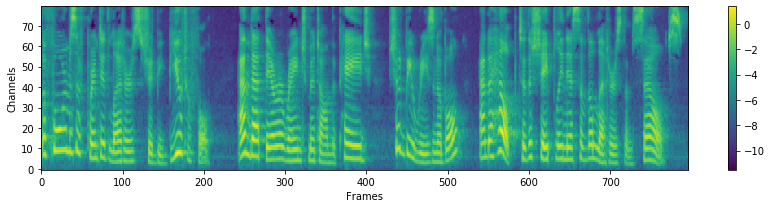

In [8]:
spectrogram = torch.load("mel_spectrograms/LJ001-0015.wav.pt")
fig, ax = plt.subplots(figsize=(12, 3))
im = ax.imshow(spectrogram, aspect="auto", origin="lower",
                interpolation='none')
plt.colorbar(im, ax=ax)
plt.xlabel("Frames")
plt.ylabel("Channels")
plt.tight_layout()

fig.canvas.draw()
plt.show()

In [9]:
!python3 inference.py -f <(ls mel_spectrograms/*.pt) -w waveglow_256channels_ljs_v3.pt -o . --is_fp16 -s 0.6

/usr/local/lib/python3.6/dist-packages/torch/serialization.py:493: SourceChangeWarning: source code of class 'torch.nn.modules.conv.ConvTranspose1d' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/usr/local/lib/python3.6/dist-packages/torch/serialization.py:493: SourceChangeWarning: source code of class 'torch.nn.modules.conv.Conv1d' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
Selected optimization level O3:  Pure FP16 training.
Defaults for this optimization level are:
enabled                : True
opt_level              : O3
cast_model_type        : torch.float16
patch_torch_functions  : False
keep_batchnorm_fp32    : F

In [0]:
import IPython.display as ipd

In [11]:
ipd.Audio('LJ001-0015.wav_synthesis.wav')